# Analysis of AML Simulated Data & ML Model fitting
Get the data from this link: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch_geometric

In [2]:
df_hi = pd.read_csv("data/HI-Small_Trans.csv")
df_li = pd.read_csv("data/LI-Small_Trans.csv")

In [3]:
df_hi.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


In [4]:
df = pd.concat([df_hi,df_li])
df.shape

(12002394, 11)

In [5]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [6]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [7]:
print(df.isnull().sum())

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


### What is the distribution of data?
There is a high possibility that the data will be imbalanced,i.e. it will have a lot more entries for non-laundred transactions compared to laundered. Let us check that out

## Data Preprocessing
In this section, we will modify the dataset to make it a bit easier to fit any data. This includes things like renaming variables,converting categorical data to numerical data etc.
Now we have to also take in account the comments made on the data repo where it was pointed out that data is only for 10 days and for days 11 and 12 entries leads to flagging of all accounts as laundered in "HI-Small_Trans.csv" file (https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/discussion/427517). A simple solution is to just filter those entries out to prevent any biased learning

In [8]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Payment Currency"] = df["Payment Currency"].astype("category")
df["Receiving Currency"] =  df["Receiving Currency"].astype("category")
df["Payment Format"] = df["Payment Format"].astype("category")
df["Account"] = df["Account"].astype("string")
df["Account.1"] = df["Account.1"].astype("string")

In [9]:
df = df[df["Timestamp"] <= "2022-09-10"]
df.shape

(11511371, 11)

In [10]:
(df["Is Laundering"] == 1).sum()/df.shape[0]

0.0006263372103983096

As noted above only 0.06% of the data has data about laundred transactions and so this can be a problem causing accuracy paradox since we have one category overshadowing the other category and hence model will be biased to predict non-laundered and will be right most of the time on test data too.

Visulaizations

In [16]:
sample = df.sample(350000,replace=True)

,Amount Paid,Amount Received
Is Laundering,,
0,28.315725,28.541636
1,16.631607,16.631607


TypeError: only length-1 arrays can be converted to Python scalars

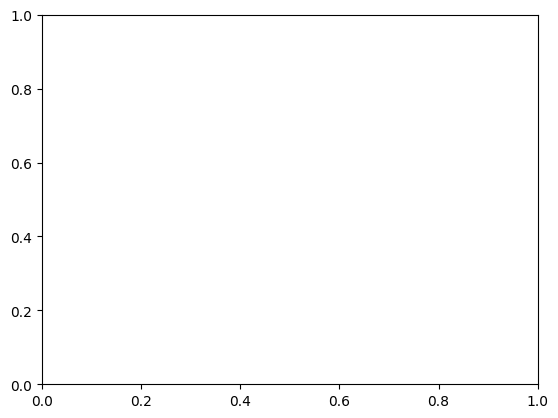

Model